In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from statsmodels.tsa import stattools


In [22]:
# Normal kernel

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 2000

prop = rng.normal(size=M) + x
u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    if u[i] <= (1+theta**2)/(1+prop[i]**2):
        theta = prop[i]
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")


acceptance rate: 0.596


In [23]:
from scipy import integrate

def pdf(t, x_):
    def integrand(t):
        return 1/np.sqrt(2*np.pi) * np.exp(-(x_-t)**2/2) / np.pi * 1/(1+t**2)
    px = integrate.quad(integrand, -np.inf, np.inf)[0]
    return integrand(t) / px



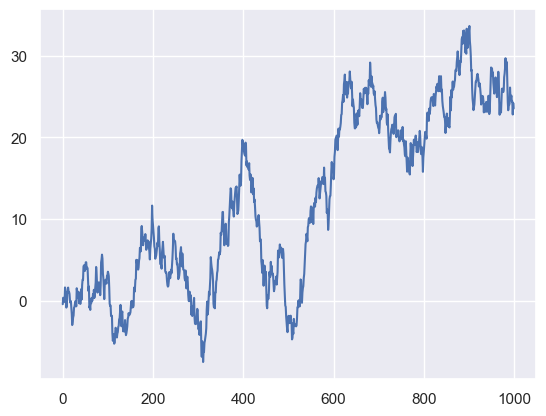

In [41]:
# ランダムウォークを生成
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
for i in range(1, M):
    theta = rng.normal(theta, 1)
    theta_list[i] = theta

# パスを描画
plt.plot(theta_list)


<Axes: >

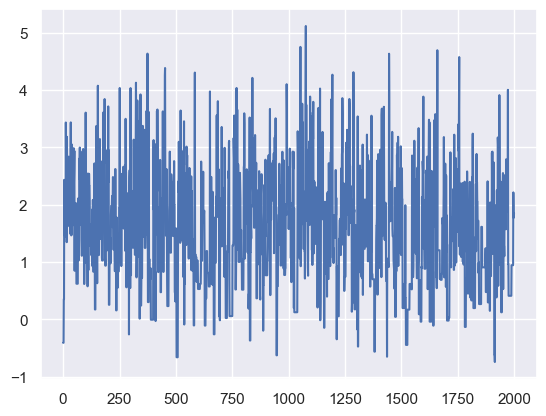

In [24]:
sns.lineplot(theta_list)


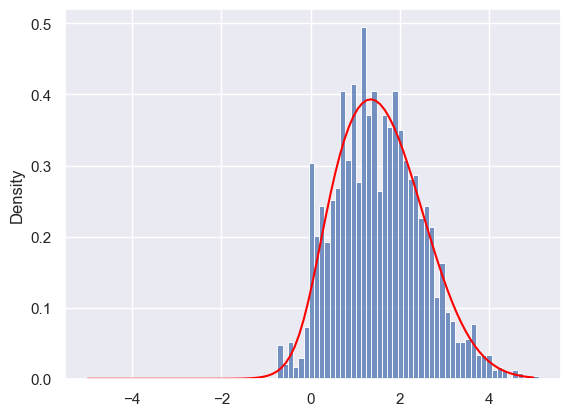

In [25]:
fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")


<Axes: >

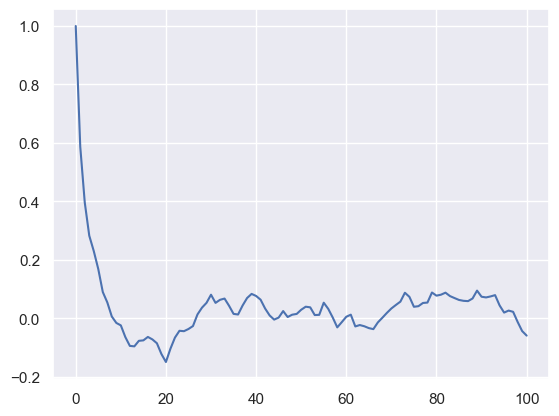

In [18]:
# 自己相関
acf = stattools.acf(theta_list, nlags=100)
sns.lineplot(acf)



In [26]:
# Cauchy kernel

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 2000

prop = rng.standard_cauchy(size=M)
u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    if u[i] <= np.exp((theta-x)**2/2 - (prop[i]-x)**2/2):
        theta = prop[i]
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")


acceptance rate: 0.2835


<Axes: >

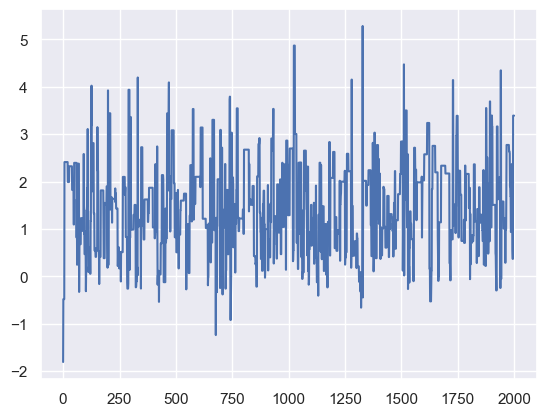

In [27]:
sns.lineplot(theta_list)


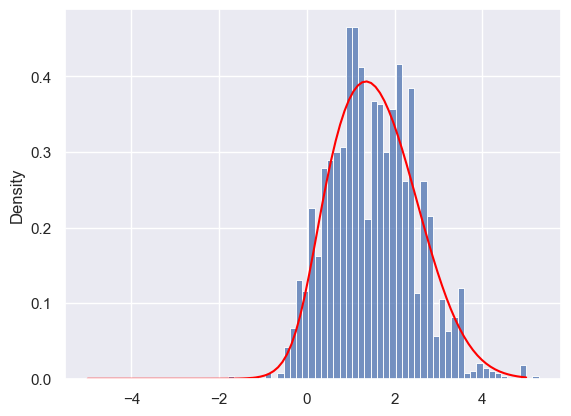

In [28]:
fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")


<Axes: >

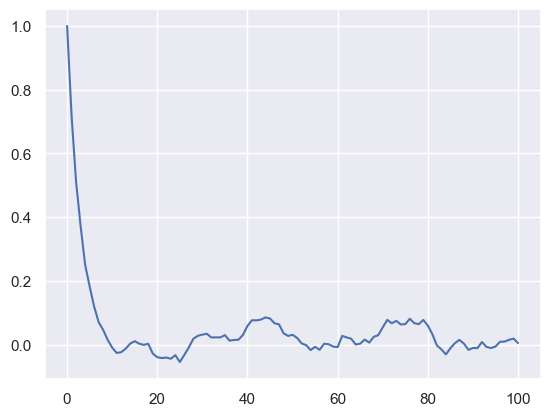

In [10]:
# 自己相関
acf = stattools.acf(theta_list, nlags=100)
sns.lineplot(acf)


acceptance rate: 0.406


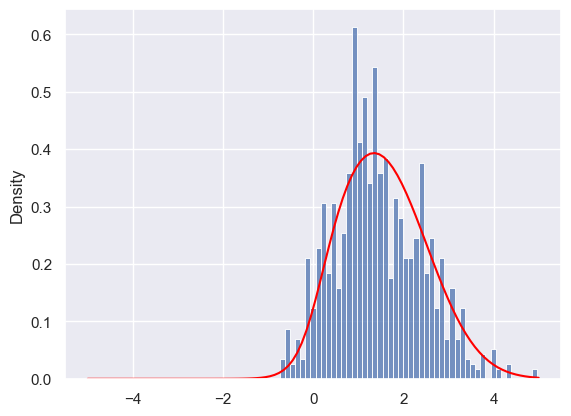

In [32]:
# Normal kernel

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 1000

def mypi(t):
    return np.exp(-(x-t)**2/2) * 1/(1+t**2)

u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    prop = rng.normal(0, 1) + theta
    if u[i] <= mypi(prop) / (mypi(prop) + mypi(theta)):
        theta = prop
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")

fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")


acceptance rate: 0.69


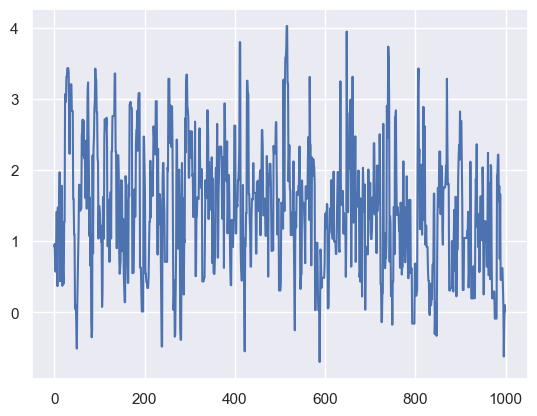

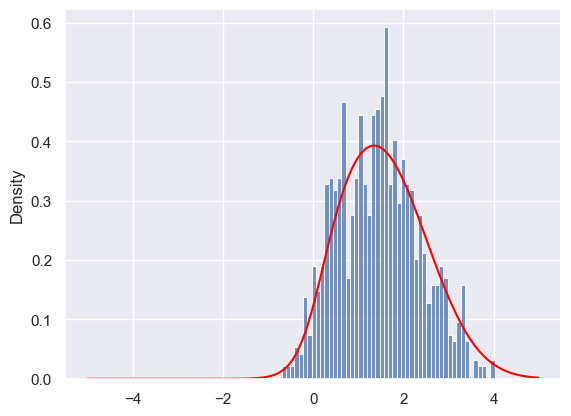

In [31]:
# Normal RW

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 1000

def mypi(t):
    return np.exp(-(x-t)**2/2) * 1/(1+t**2)

u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    prop = rng.normal(0, 1) + theta
    if u[i] <= mypi(prop) /  mypi(theta):
        theta = prop
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")

sns.lineplot(theta_list)

fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")


acceptance rate: 0.517


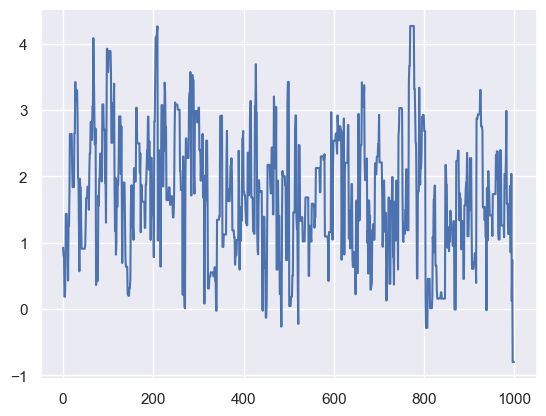

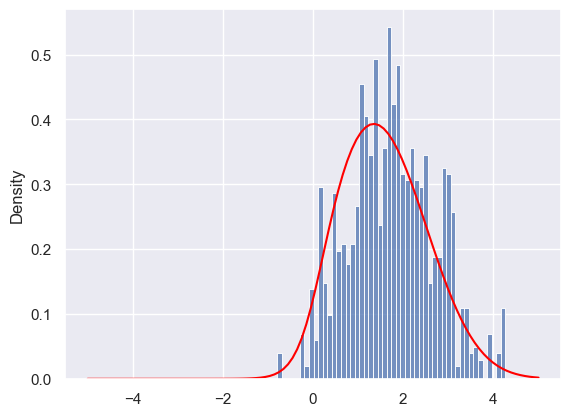

In [34]:
# Normal RW

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 1000

def mypi(t):
    return np.exp(-(x-t)**2/2) * 1/(1+t**2)

u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    prop = rng.standard_cauchy() + theta
    if u[i] <= mypi(prop) /  mypi(theta):
        theta = prop
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")

sns.lineplot(theta_list)

fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")


acceptance rate: 0.94


<Axes: >

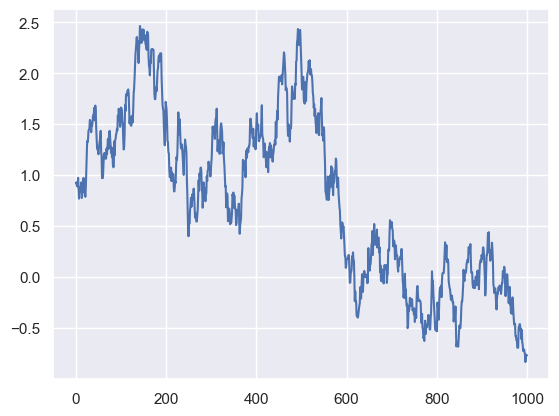

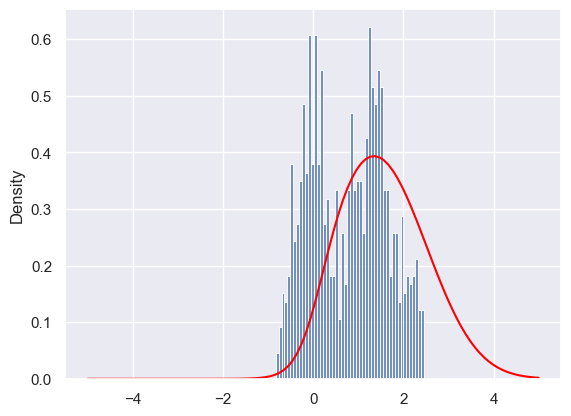

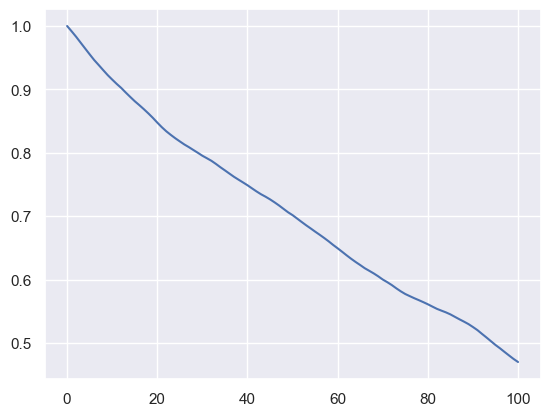

In [39]:
# Normal RW

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 1000

def mypi(t):
    return np.exp(-(x-t)**2/2) * 1/(1+t**2)

u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    prop = rng.normal(0, 0.1) + theta
    if u[i] <= mypi(prop) /  mypi(theta):
        theta = prop
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")

sns.lineplot(theta_list)

fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")

# 自己相関
fig, ax = plt.subplots()
acf = stattools.acf(theta_list, nlags=100)
sns.lineplot(acf, ax=ax)


acceptance rate: 0.14


<Axes: >

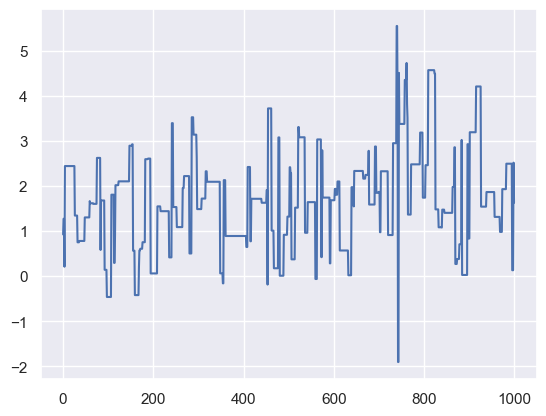

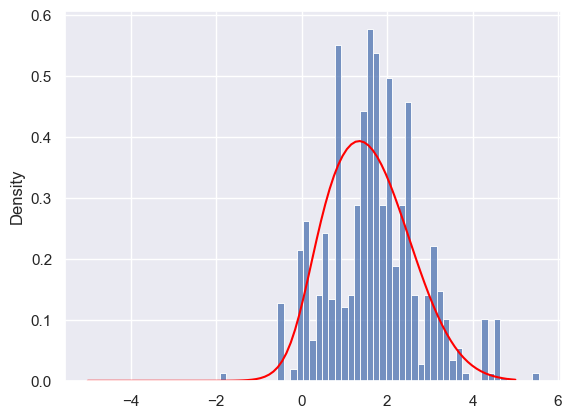

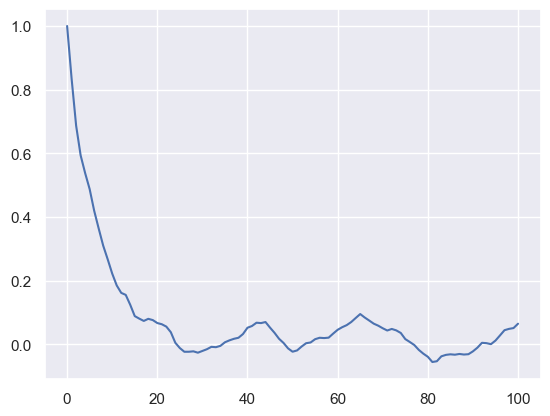

In [40]:
# Normal RW

rng = np.random.default_rng(42)

theta0 = 2.0
x = rng.normal(0, 1) + theta0
M = 1000

def mypi(t):
    return np.exp(-(x-t)**2/2) * 1/(1+t**2)

u = rng.uniform(size=M)
theta_list = np.zeros(M)
theta = rng.normal(0, 1)  # 初期値. なんでもいい.
theta_list[0] = theta
is_accepted = np.zeros(M)
for i in range(1, M):
    prop = rng.normal(0, 10) + theta
    if u[i] <= mypi(prop) /  mypi(theta):
        theta = prop
        is_accepted[i] = 1
    theta_list[i] = theta
print(f"acceptance rate: {np.mean(is_accepted)}")

sns.lineplot(theta_list)

fig, ax = plt.subplots()
sns.histplot(theta_list, bins=50, ax = ax, stat="density")
t_ = np.linspace(-5, 5, 100)
ax.plot(t_, [pdf(t, x) for t in t_], color="red")

# 自己相関
fig, ax = plt.subplots()
acf = stattools.acf(theta_list, nlags=100)
sns.lineplot(acf, ax=ax)


ランダムウォーク法では, 
- Step幅が大きすぎるとacceptされづらい
- Step幅が小さすぎるとacceptはされるがエルゴード性がはたらきづらい(動く範囲がせまいため)
- ちょうどいいステップ幅をみつける必要がある
    - もとの分布の分散くらいにしたいが, それがわからず困っている